In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn  as sns
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
sns.set_style('whitegrid')

In [3]:
google_play_store = pd.read_csv('googleplaystore.csv')

In [4]:
google_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_play_store = google_play_store.dropna()

In [6]:
google_play_store = google_play_store.drop_duplicates()

In [7]:
google_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
App               8886 non-null object
Category          8886 non-null object
Rating            8886 non-null float64
Reviews           8886 non-null object
Size              8886 non-null object
Installs          8886 non-null object
Type              8886 non-null object
Price             8886 non-null object
Content Rating    8886 non-null object
Genres            8886 non-null object
Last Updated      8886 non-null object
Current Ver       8886 non-null object
Android Ver       8886 non-null object
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


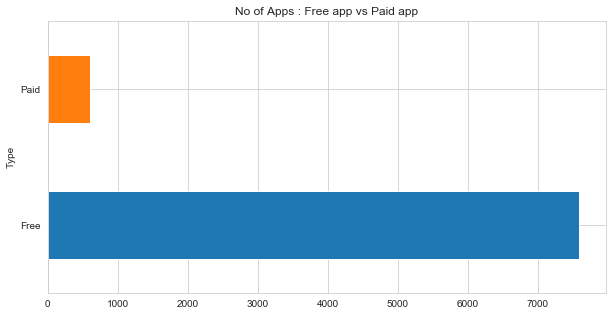

In [8]:
plt.figure(figsize=(10,5))
google_play_store.groupby('Type').App.nunique().plot.barh()
_ = plt.title('No of Apps : Free app vs Paid app')

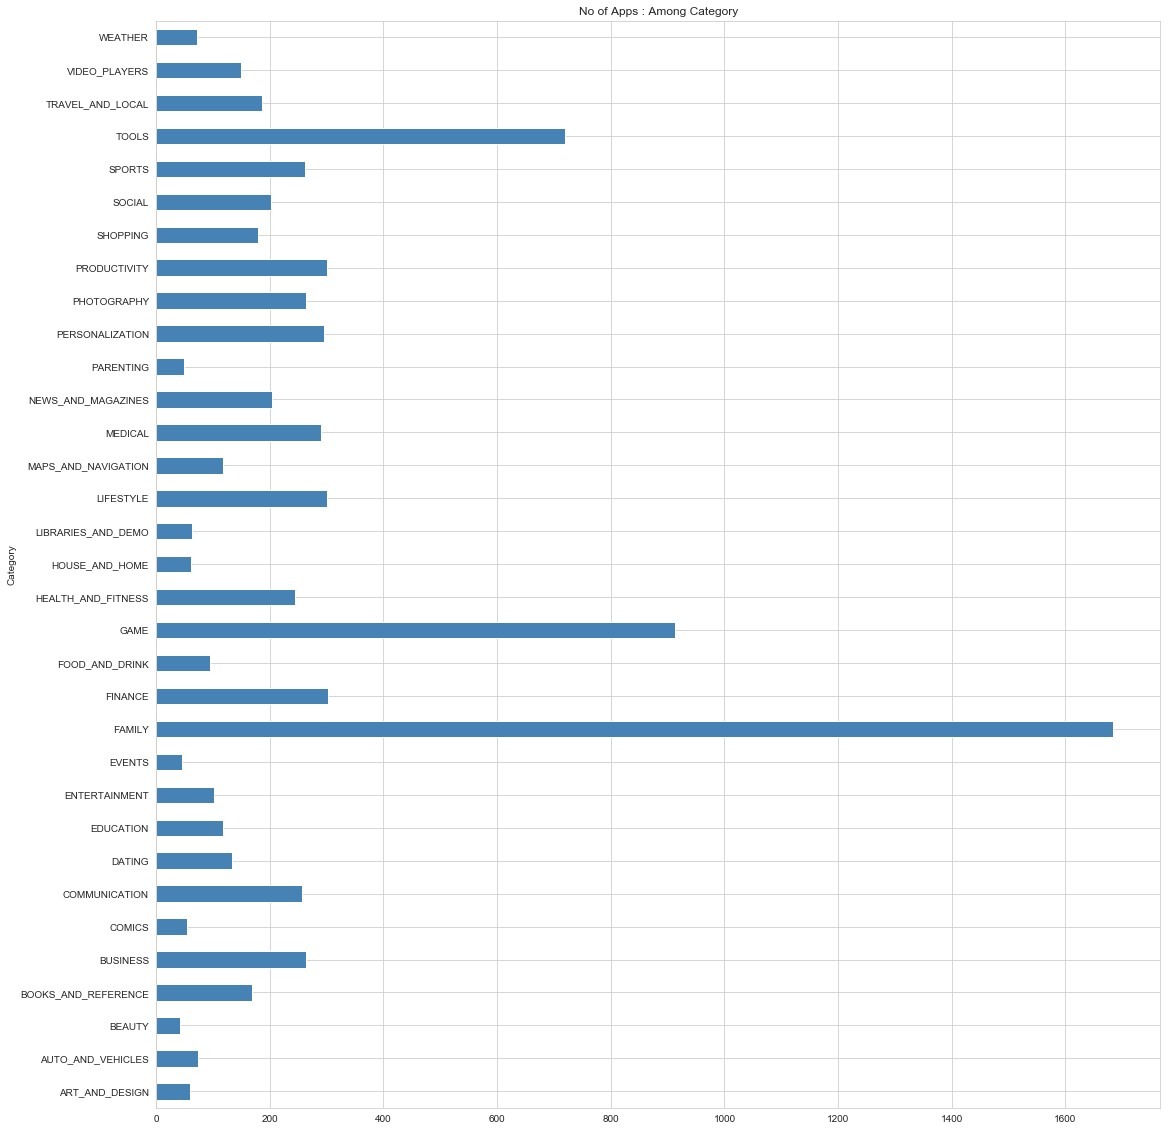

In [9]:
plt.figure(figsize=(18,20))
google_play_store.groupby('Category').App.nunique().plot.barh(color='steelblue')
_ = plt.title('No of Apps : Among Category')

In [10]:
type_ = google_play_store.groupby(['Type','Content Rating'],as_index=False)\
                            .agg({'App':lambda x: len(x.unique())}).rename(columns={'App':'#apps'})

In [11]:
type_ = pd.pivot_table(type_,index='Type',columns='Content Rating',values='#apps',aggfunc=sum,fill_value=0)

In [12]:
type_

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,6103,274,342,867,1
Paid,0,511,31,15,45,0


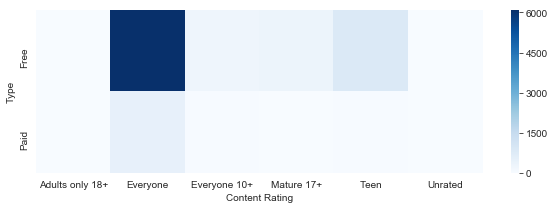

In [13]:
plt.figure(figsize=(10,3))
sns.heatmap(type_,cmap='Blues')

In [14]:
def converting_size(values):
    
    if 'M' in values:
        values = float(values[:-1]) 
    elif 'k' in values:
        values = float(values[:-1]) / 1024
    else:
        values = 0
        
    return values
        

In [15]:
google_play_store.loc[:,'Size'] = google_play_store.loc[:,'Size'].apply(converting_size)

In [16]:
google_play_store.loc[:,'Size'] = google_play_store.loc[:,'Size'].astype(float)

19.000365447139426


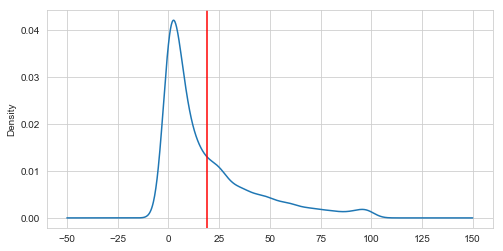

In [17]:
plt.figure(figsize=(8,4))
google_play_store.Size.plot.kde()
plt.axvline(google_play_store.Size.mean(),color='r')
print(google_play_store.Size.mean()  )

In [18]:
size_ = google_play_store.groupby(['Type','Content Rating'],as_index=False)\
                            .agg({'Size':np.mean}).rename(columns={'Size':'size'})

In [19]:
size_ = pd.pivot_table(size_,index='Type',columns='Content Rating',values='size',aggfunc=np.mean,fill_value=0)

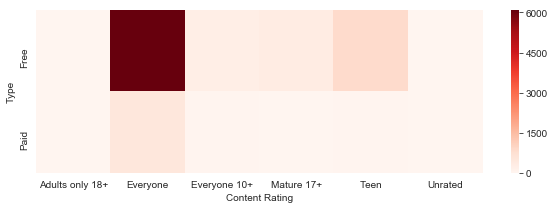

In [20]:
plt.figure(figsize=(10,3))
sns.heatmap(type_,cmap='Reds')

In [21]:
google_play_store.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
google_play_store.loc[:,'Price'] = google_play_store.loc[:,'Price'].apply(lambda x: float(x.replace('$','')))

In [23]:
google_play_store.loc[:,'Installs'] = google_play_store.loc[:,'Installs'].apply(lambda x: int(x.replace('+','').replace(',','')))

In [24]:
google_play_store.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

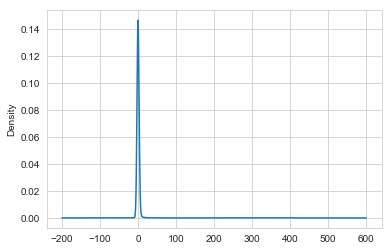

In [25]:
google_play_store.Price.plot.kde()

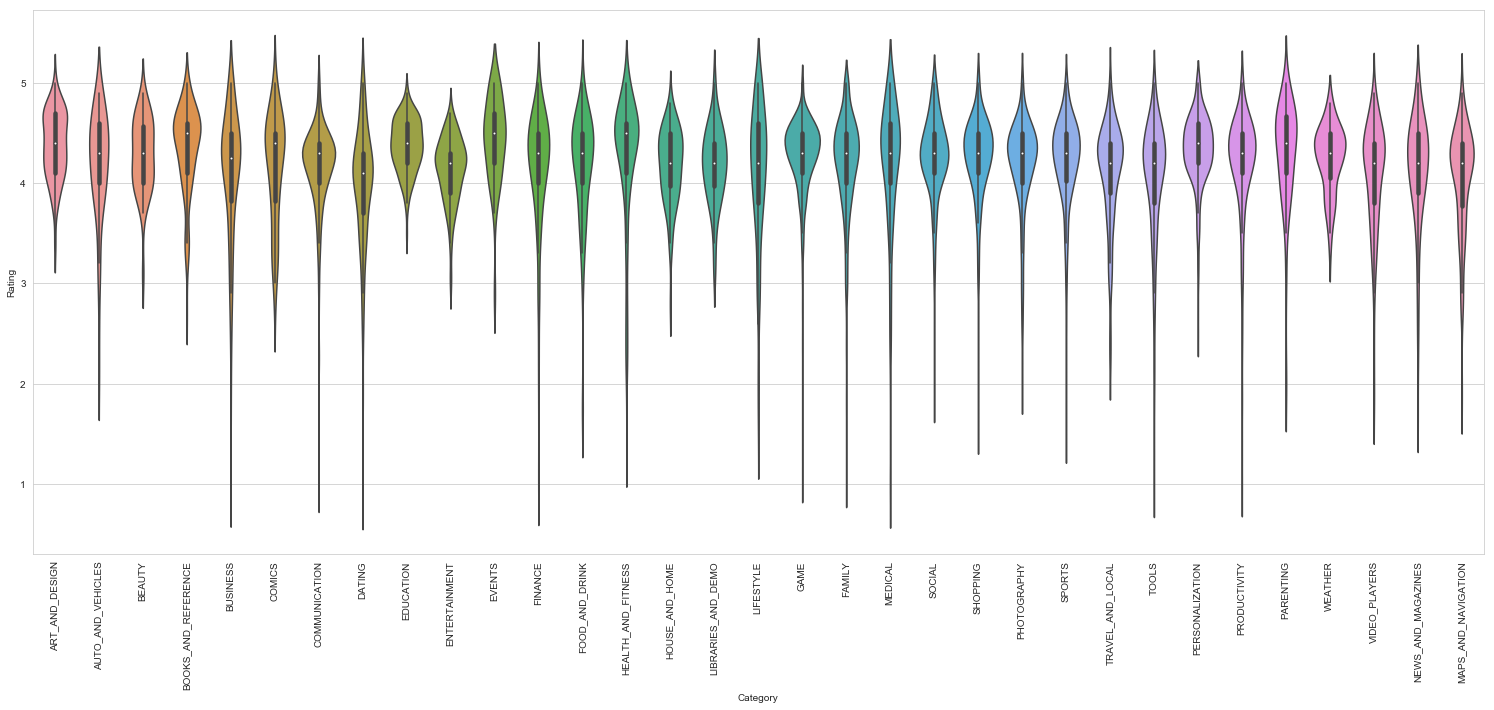

In [26]:
plt.figure(figsize=(26,10))
sns.violinplot(x="Category", y="Rating", data=google_play_store)
_ = plt.xticks(rotation=90)

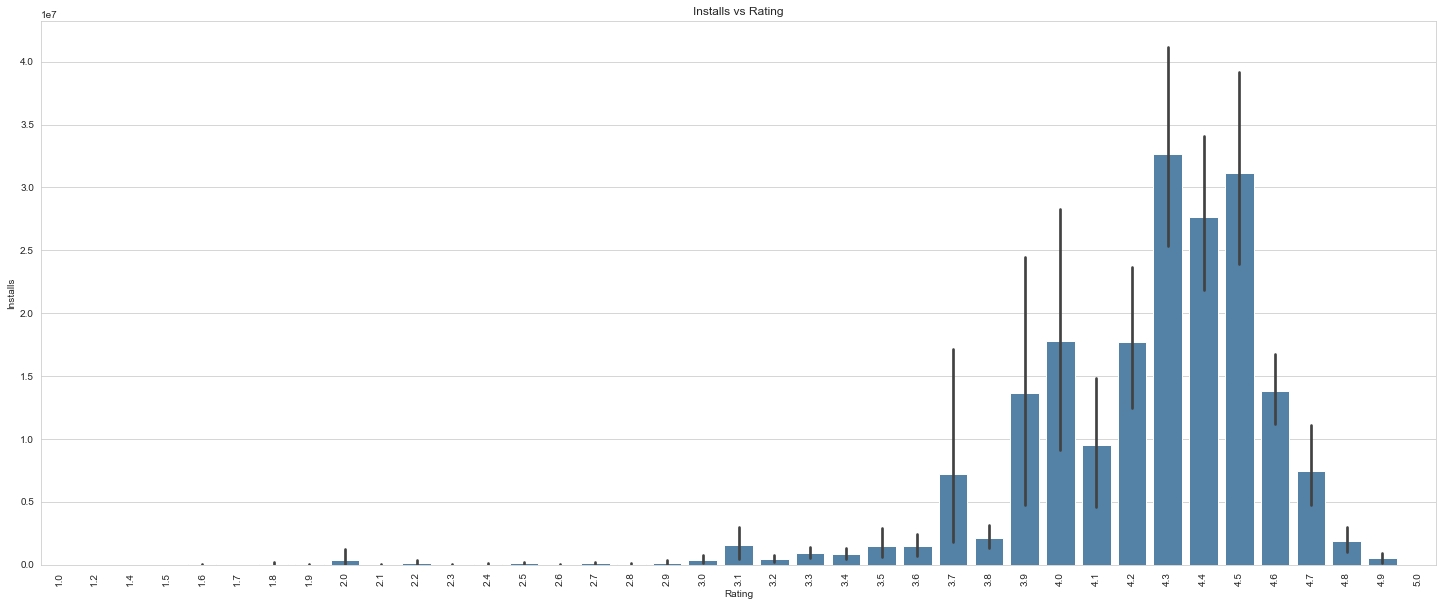

In [27]:
plt.figure(figsize=(25,10))
plt.title('Installs vs Rating')
sns.barplot(x="Rating", y="Installs", data=google_play_store,color='steelblue')
_ = plt.xticks(rotation=90)

In [33]:
google_play_store['Reviews'] = google_play_store['Reviews'].astype(int)

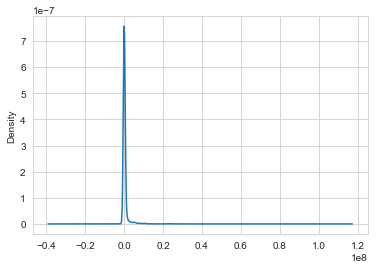

In [35]:
(google_play_store['Reviews']).plot.kde()

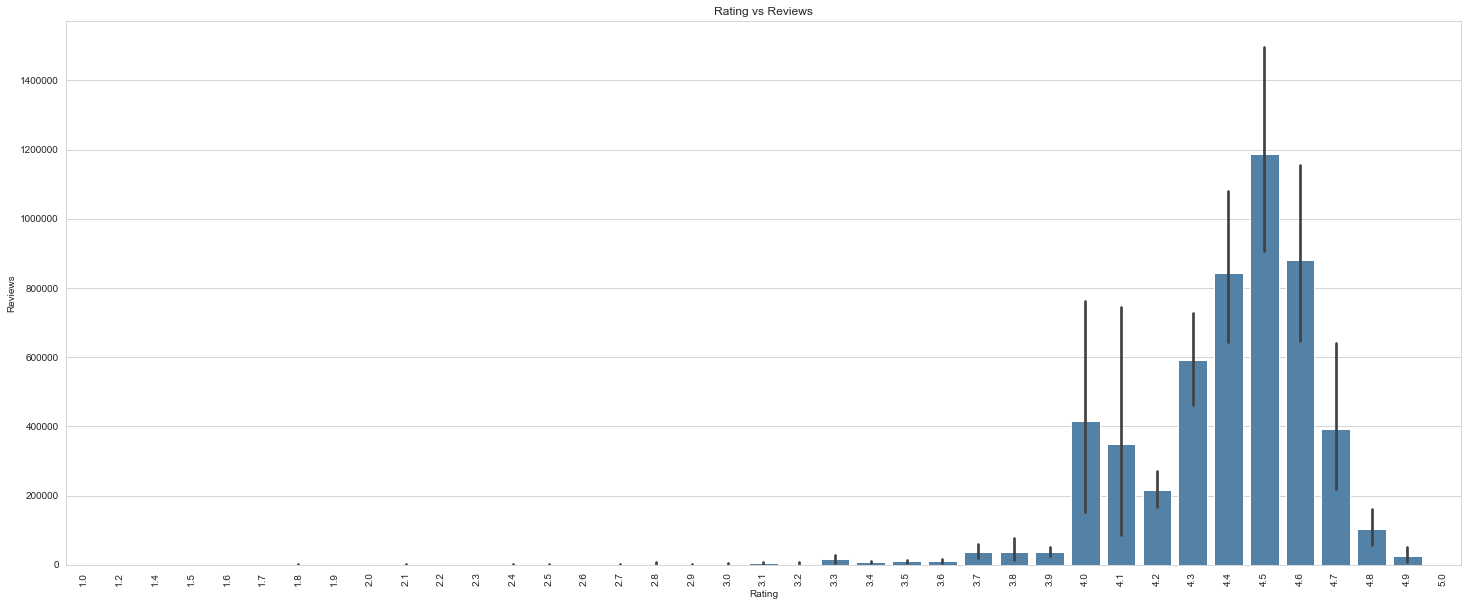

In [37]:
plt.figure(figsize=(25,10))
plt.title('Rating vs Reviews')
sns.barplot(x="Rating", y="Reviews", data=google_play_store,color='steelblue')
_ = plt.xticks(rotation=90)

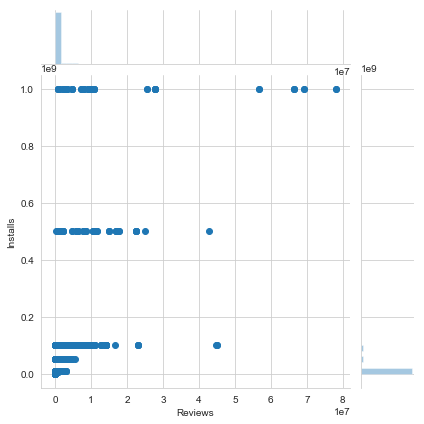

In [38]:
sns.jointplot(google_play_store['Reviews'],google_play_store['Installs'])

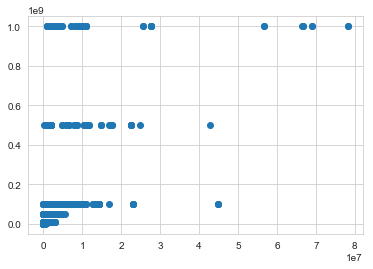

In [39]:
plt.scatter(google_play_store['Reviews'],google_play_store['Installs'])

In [42]:
google_play_store.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068724,0.047059,0.050869,-0.022371
Reviews,0.068724,1.000000,0.067338,0.633422,-0.009562
Size,0.047059,0.067338,1.000000,-0.006744,-0.017136
Installs,0.050869,0.633422,-0.006744,1.000000,-0.011334
Price,-0.022371,-0.009562,-0.017136,-0.011334,1.000000


In [46]:
google_play_store.query("Price >0 ").corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.044491,0.095186,0.059924,-0.112738
Reviews,0.044491,1.000000,-0.014573,0.868595,-0.014810
Size,0.095186,-0.014573,1.000000,0.030983,-0.061898
Installs,0.059924,0.868595,0.030983,1.000000,-0.022690
Price,-0.112738,-0.014810,-0.061898,-0.022690,1.000000


In [48]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e13fb70>,
      dtype=object)

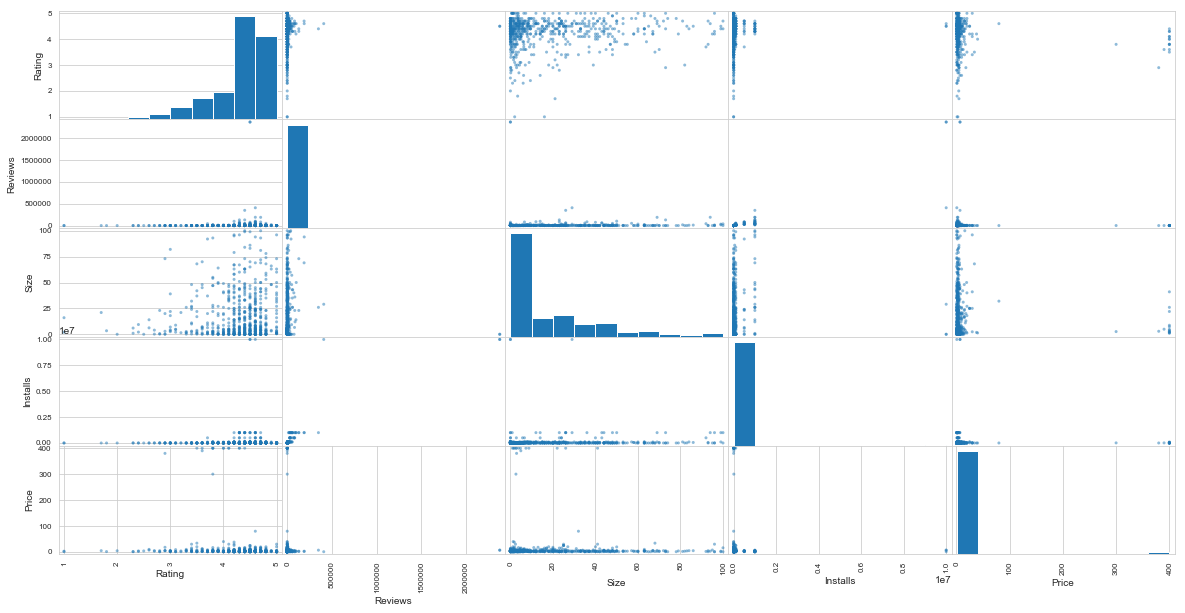

In [53]:
scatter_matrix(google_play_store.query("Price >0 "),figsize=(20,10))